In [64]:
import pandas as pd
import numpy as np
from geopy.geocoders import GoogleV3
from pygeocoder import Geocoder
import matplotlib.pyplot as plt
import folium

In [59]:
#Load the Rest Area dataset
df = pd.read_csv('Rest_Area.csv')

#Subset only required columns
df1 = df[['RESTAREAID','LATITUDE','LONGITUDE','MUNICIPALITY','ROADNAME','TOILETS','DISABLEDTOILETS','PICNICTABLES', 'WATER', 'COMMERCIALACTIVITY' ]]
df1.head()

,RESTAREAID,LATITUDE,LONGITUDE,MUNICIPALITY,ROADNAME,TOILETS,DISABLEDTOILETS,PICNICTABLES,WATER,COMMERCIALACTIVITY
0,1000001,-37.869200,144.762170,HOBSONS BAY,PRINCES HIGHWAY WEST,GOOD,GOOD,NONE,EXCELLENT,FAST FOOD
1,1000002,-37.927681,144.630386,WYNDHAM,PRINCES HIGHWAY WEST,GOOD,GOOD,NONE,EXCELLENT,FAST FOOD
2,1000003,-38.002548,144.492355,GEELONG,PRINCES HIGHWAY WEST,GOOD,GOOD,GOOD,EXCELLENT,FAST FOOD
3,1000004,-38.001476,144.492325,GEELONG,PRINCES HIGHWAY WEST,GOOD,GOOD,GOOD,EXCELLENT,FAST FOOD
4,1000005,-38.469948,144.058182,SURF COAST,GREAT OCEAN ROAD,NONE,NONE,NONE,GOOD,NONE


In [60]:
#convert None and Not Assessed to NaN
df1['TOILETS'] = df1['TOILETS'].replace('NONE',np.NaN)

#convert None and Not Assessed to NaN
df1['DISABLEDTOILETS'] = df1['DISABLEDTOILETS'].replace('NONE',np.NaN)

#convert None and Not Assessed to NaN
df1['PICNICTABLES'] = df1['PICNICTABLES'].replace('NONE',np.NaN)
df1['PICNICTABLES'] = df1['PICNICTABLES'].replace('NOT ASSESSED',np.NaN)

#convert None and Not Assessed to NaN
df1['WATER'] = df1['WATER'].replace('NONE',np.NaN)
df1['WATER'] = df1['WATER'].replace('NOT ASSESSED',np.NaN)

#convert None and Not Assessed to NaN
df1['COMMERCIALACTIVITY'] = df1['COMMERCIALACTIVITY'].replace('NONE',np.NaN)
df1['COMMERCIALACTIVITY'] = df1['COMMERCIALACTIVITY'].replace('NOT ASSESSED',np.NaN)

#Convert all non-nulls to YES
df1['TOILETS'] = df1['TOILETS'].replace(['EXCELLENT', 'GOOD', 'POOR'], 'YES')
df1['DISABLEDTOILETS'] = df1['DISABLEDTOILETS'].replace(['EXCELLENT', 'GOOD', 'POOR'], 'YES')
df1['PICNICTABLES'] = df1['PICNICTABLES'].replace(['EXCELLENT', 'GOOD', 'POOR'], 'YES')
df1['WATER'] = df1['WATER'].replace(['EXCELLENT', 'GOOD', 'POOR'], 'YES')
df1['COMMERCIALACTIVITY'] = df1['COMMERCIALACTIVITY'].replace(['FAST FOOD', 'FAST FOOD PRODUCE'], 'YES')

#Rename COMMERCIALACTIVITY to FAST FOOD
df1 = df1.rename(columns={'COMMERCIALACTIVITY': 'FAST FOOD'}) 

#Show Dataframe

df1.to_csv('Rest_Areas_final.csv', encoding = "utf-8")
df1

C:\Users\ShivaKumarVinnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ShivaKumarVinnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ShivaKumarVinnu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

,RESTAREAID,LATITUDE,LONGITUDE,MUNICIPALITY,ROADNAME,TOILETS,DISABLEDTOILETS,PICNICTABLES,WATER,FAST FOOD
0,1000001,-37.869200,144.762170,HOBSONS BAY,PRINCES HIGHWAY WEST,YES,YES,NaN,YES,YES
1,1000002,-37.927681,144.630386,WYNDHAM,PRINCES HIGHWAY WEST,YES,YES,NaN,YES,YES
2,1000003,-38.002548,144.492355,GEELONG,PRINCES HIGHWAY WEST,YES,YES,YES,YES,YES
3,1000004,-38.001476,144.492325,GEELONG,PRINCES HIGHWAY WEST,YES,YES,YES,YES,YES
4,1000005,-38.469948,144.058182,SURF COAST,GREAT OCEAN ROAD,NaN,NaN,NaN,YES,NaN
5,1000006,-38.470211,144.056229,SURF COAST,GREAT OCEAN ROAD,NaN,NaN,NaN,YES,NaN
6,1000007,-38.470554,144.053421,SURF COAST,GREAT OCEAN ROAD,NaN,NaN,NaN,YES,NaN
7,1000008,-38.471828,144.045120,SURF COAST,GREAT OCEAN ROAD,NaN,NaN,NaN,YES,NaN
8,1000009,-38.475170,144.036758,SURF COAST,GREAT OCEAN ROAD,NaN,NaN,NaN,YES,NaN
9,1000010,-38.477299,144.034027,SURF COAST,GREAT OCEAN ROAD,NaN,NaN,NaN,YES,NaN


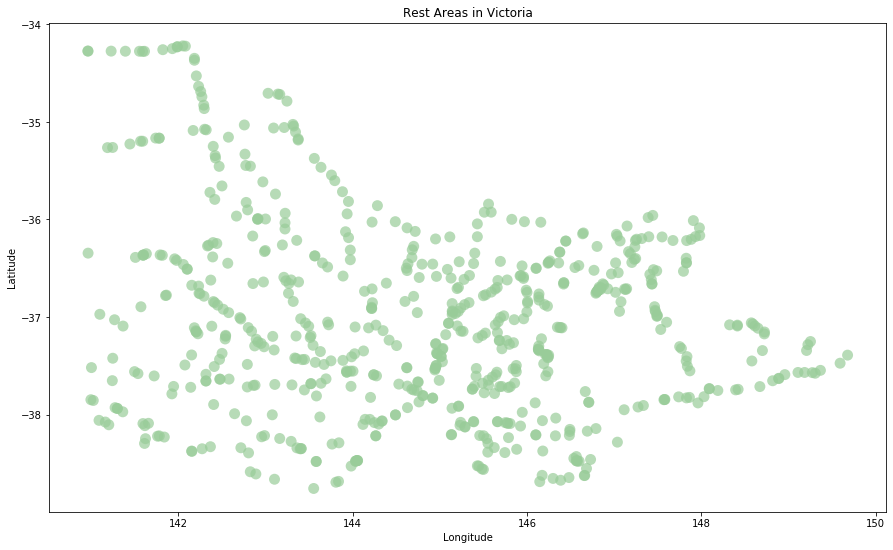

In [62]:
# plot the final reduced set of coordinate points vs the original full set
fig, ax = plt.subplots(figsize=[15, 9])
rs_scatter = ax.scatter(df1['LONGITUDE'], df1['LATITUDE'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
ax.set_title('Rest Areas in Victoria')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [66]:
map = folium.Map(location=[37.869200,144.762170], default_zoom_start=15)